In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
from os.path import join
from auto_analytics.tool_chat_loop import tool_chat_loop,tool_chat_loop_2, shell, tool_chat_loop_2nb
from auto_analytics.supervisor_loop import supervisor_chat_loop_2nb, system_message_library
from auto_analytics.utils.format_utils import message_thread_render
from auto_analytics.utils.nbformat_utils import save_cells_to_nb
from nbformat.v4 import new_notebook, new_code_cell, new_output, new_markdown_cell
from auto_analytics.utils.nbformat_utils import create_code_cell_from_captured, save_cells_to_nb
from auto_analytics.utils.nbformat_utils import convert_notebook_to_html, convert_notebook_to_pdf

report_dir = r"/Users/binxuwang/Github/GPT-Auto-Data-Analytics/reports"

In [11]:
import os
result_dir = join(report_dir, "Pokemon_analysis")
os.makedirs(result_dir, exist_ok=True)

### Supervisor chat loop

In [5]:
table_descriptions = """
Context
This data set includes 1025 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed. It has been of great use when teaching statistics to kids. With certain types you can also give a geeky introduction to machine learning.
"""
column_descriptions = """
Content
#: ID for each pokemon
Name: Name of each pokemon
Type 1: Each pokemon has a type, this determines weakness/resistance to attacks
Type 2: Some pokemon are dual type and have 2
Total: sum of all stats that come after this, a general guide to how strong a pokemon is
HP: hit points, or health, defines how much damage a pokemon can withstand before fainting
Attack: the base modifier for normal attacks (eg. Scratch, Punch)
Defense: the base damage resistance against normal attacks
SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
SP Def: the base damage resistance against special attacks
Speed: determines which pokemon attacks first each round
"""

task_objective = """Perform explorative data analysis of this dataset, 
First, pose potential questions that could be answered by analyzing this dataset
Organize these question by the type of analysis that would be required to answer them.

These questions will be send to data scientist to write code to answer. 
"""
csvpath = "/Users/binxuwang/Github/GPT-Auto-Data-Analytics/table_data/Pokemon.csv"

nbcells = []
messages, nbcells, cache = supervisor_chat_loop_2nb(f"Here is a dataset, that can be loaded from {csvpath}."\
                            f"the dataset description {table_descriptions}. "\
                            f"and the column desctiption {column_descriptions}.\n"\
                            f"Our objective is to {task_objective}", 
                            model_name="gpt-4-turbo-preview", 
                            MAX_ROUND=1, nbcells=nbcells, )


Given the dataset description you've provided, which includes a variety of
Pokémon attributes, here's how we can formulate research questions and
categorize them according to the type of analytical tools required to answer
them.

### Research Questions:

#### General Descriptive Questions:
1. What is the distribution of Pokémon across the different types (Type 1)?
2. How do primary and secondary types (Type 1 and Type 2) correlate with each
Pokémon's total strength?

#### Performance Comparison:
3. Which Pokémon type (Type 1) has the highest average total stats?
4. How do dual-typed Pokémon (those with both Type 1 and Type 2) compare in
total strength to those with only one type?
5. Is there a correlation between Pokémon's HP, Attack, and Defense stats and
their total stats?

#### Trends and Patterns:
6. Are there discernible patterns in how stats have evolved across Pokémon
generations (if generation data is inferred or added)?
7. What are the common characteristics of the top 10% of 

In [7]:
messages[2]

ChatCompletionMessage(content='Given the dataset description you\'ve provided, which includes a variety of Pokémon attributes, here\'s how we can formulate research questions and categorize them according to the type of analytical tools required to answer them.\n\n### Research Questions:\n\n#### General Descriptive Questions:\n1. What is the distribution of Pokémon across the different types (Type 1)?\n2. How do primary and secondary types (Type 1 and Type 2) correlate with each Pokémon\'s total strength?\n\n#### Performance Comparison:\n3. Which Pokémon type (Type 1) has the highest average total stats?\n4. How do dual-typed Pokémon (those with both Type 1 and Type 2) compare in total strength to those with only one type?\n5. Is there a correlation between Pokémon\'s HP, Attack, and Defense stats and their total stats?\n\n#### Trends and Patterns:\n6. Are there discernible patterns in how stats have evolved across Pokémon generations (if generation data is inferred or added)?\n7. What

In [12]:
content = messages[-1].content
# Write content to markdown file
with open(f"{result_dir}/analysis_questions.md", "w") as file:
    file.write(content)

In [14]:
import pickle as pkl
pkl.dump((messages, nbcells, ), 
         open(f"{result_dir}/supervisor_messages.pkl", "wb"))

### Data Analysis loop

In [15]:
# read the objetive from the markdown file
with open(f"{result_dir}/analysis_questions.md", "r") as file:
    supervisor_objective = file.read()

Python Code executed:
```python
import pandas as pd

# Load the dataset
pokemon_data = pd.read_csv('/Users/binxuwang/Github/GPT-Auto-Data-Analytics/table_data/Pokemon.csv')

# Display the first few rows of the dataset
pokemon_data.head()
```
Execution Succeed:


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45.0,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60.0,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80.0,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80.0,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39.0,52,43,60,50,65,1,False


The dataset has been successfully loaded, and here are the first few rows of the
dataset:

|  #  | Name                | Type 1 | Type 2 | Total | HP  | Attack | Defense |
Sp. Atk | Sp. Def | Speed | Generation | Legendary |
|----|----------------------|--------|--------|-------|-----|--------|---------
|---------|---------|-------|------------|-----------|
| 1  | Bulbasaur           | Grass  | Poison | 318   | 45  | 49     | 49      |
65      | 65      | 45    | 1          | False     |
| 2  | Ivysaur             | Grass  | Poison | 405   | 60  | 62     | 63      |
80      | 80      | 60    | 1          | False     |
| 3  | Venusaur            | Grass  | Poison | 525   | 80  | 82     | 83      |
100     | 100     | 80    | 1          | False     |
| 3  | VenusaurMega Venusaur| Grass  | Poison | 625   | 80  | 100    | 123     |
122     | 120     | 80    | 1          | False     |
| 4  | Charmander          | Fire   | NaN    | 309   | 39  | 52     | 43      |
60      | 50      | 65    |

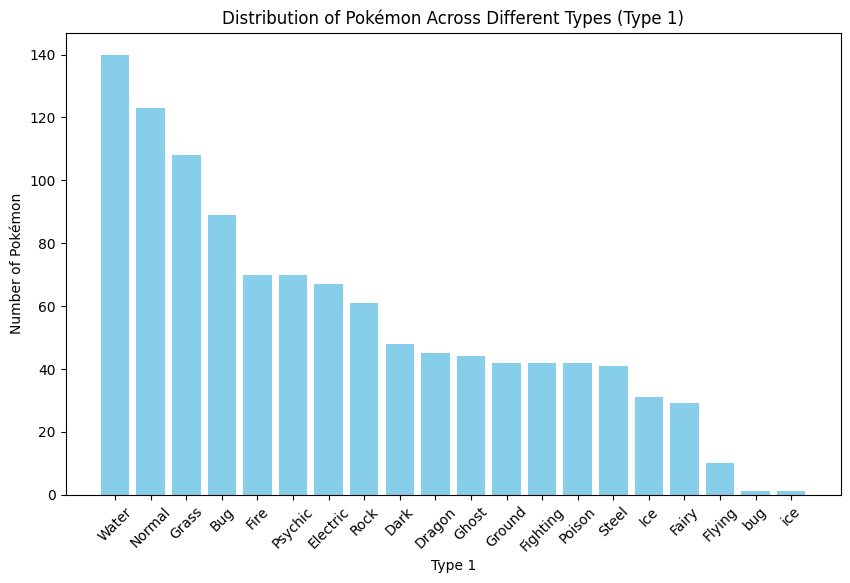

Python Code executed:
```python
# Correlation between primary and secondary types and total strength
import seaborn as sns

# Scatter plot of total strength vs. primary and secondary types
plt.figure(figsize=(12, 8))
sns.scatterplot(data=pokemon_data, x='Type 1', y='Total', hue='Type 2')
plt.title('Correlation Between Primary and Secondary Types and Total Strength')
plt.xlabel('Type 1')
plt.ylabel('Total Strength')
plt.xticks(rotation=45)
plt.legend(title='Type 2', bbox_to_anchor=(1, 1))
plt.show()
```
Execution Succeed:


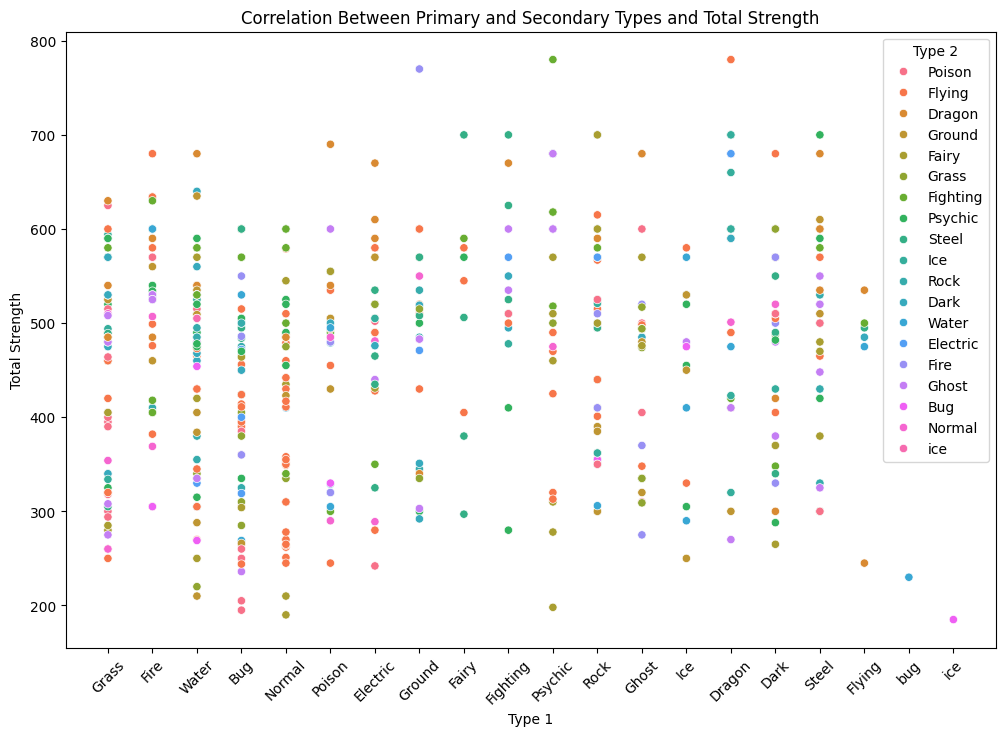

Python Code executed:
```python
# Pokémon type (Type 1) with the highest average total stats
average_total_stats_by_type1 = pokemon_data.groupby('Type 1')['Total'].mean()
average_total_stats_by_type1.nlargest(1)
```
Execution Succeed:


Type 1
Dragon    526.8
Name: Total, dtype: float64

Python Code executed:
```python
# Comparison of dual-typed Pokémon with single-typed Pokémon

# Create a new column to identify dual-typed Pokémon
pokemon_data['Dual_Type'] = pokemon_data['Type 2'].apply(lambda x: 'Single' if pd.isnull(x) else 'Dual')

# Average total strength by single and dual types
average_total_stats_by_dual_type = pokemon_data.groupby('Dual_Type')['Total'].mean()
average_total_stats_by_dual_type
```
Execution Succeed:


Dual_Type
Dual      466.305743
Single    408.201172
Name: Total, dtype: float64

Python Code executed:
```python
# Correlation between Pokémon's HP, Attack, Defense stats and their total stats
pokemon_data[['Total', 'HP', 'Attack', 'Defense']].corr()
```
Execution Succeed:


,Total,HP,Attack,Defense
Total,1.000000,0.645851,0.735895,0.629855
HP,0.645851,1.000000,0.464448,0.296401
Attack,0.735895,0.464448,1.000000,0.464316
Defense,0.629855,0.296401,0.464316,1.000000


The analysis to address the research questions has been performed. Here are the
results:

## General Descriptive Questions:
1. **Distribution of Pokémon across the Different Types (Type 1):**
   - The distribution of Pokémon across the different types has been visualized
in the bar chart below:

   ![Distribution of Pokémon Across Different Types (Type
1)](sandbox:/home/assistant/TmpMapView0)

2. **Correlation Between Primary and Secondary Types and Total Strength:**
   - The scatter plot below represents the correlation between primary and
secondary types (Type 1 and Type 2) and the total strength of Pokémon. Different
colors represent the secondary type.

   ![Correlation Between Primary and Secondary Types and Total
Strength](sandbox:/home/assistant/TmpMapView1)

## Performance Comparison:
3. **Pokémon Type (Type 1) with the Highest Average Total Stats:**
   - The Pokémon type "Dragon" has the highest average total stats, with a value
of 526.8.

4. **Comparison of Dual-Typed Pokémon

,count,mean,std,min,25%,50%,75%,max
#,105.0,490.866667,262.832978,3.0,282.0,475.0,716.0,1025.0
Total,105.0,641.409524,49.763613,594.0,600.0,618.0,680.0,780.0
HP,105.0,94.323810,22.763202,50.0,80.0,95.0,105.0,160.0
Attack,105.0,123.723810,28.195572,65.0,100.0,120.0,145.0,190.0
Defense,105.0,104.904762,29.396665,20.0,90.0,100.0,120.0,230.0
Sp. Atk,105.0,116.904762,32.282862,40.0,95.0,120.0,140.0,194.0
Sp. Def,105.0,102.609524,23.112391,20.0,90.0,100.0,115.0,160.0
Speed,105.0,98.942857,26.295594,30.0,85.0,99.0,110.0,180.0
Generation,105.0,4.190476,2.253609,1.0,3.0,4.0,6.0,9.0


Python Code executed:
```python
# Predicting Pokémon's Type Based on Stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

df = pokemon_data.copy()
# Convert categorical data (Type 1 and Type 2) into numerical format for machine learning models
labelencoder = LabelEncoder()
df['Type 1'] = labelencoder.fit_transform(df['Type 1'])
df['Type 2'] = labelencoder.fit_transform(df['Type 2'].fillna('None'))

# Features and target variable
X = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
y = df['Type 1']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict the Pokémon type based on stats
y_pred = clf.predict(X_test)

# Calculate accuracy
accurac

0.12669683257918551

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Python Code executed:
```python
# Predicting Pokémon's Total Strength Based on Individual Stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Features and target variable
X = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
y = df['Total']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression Model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predict Pokémon's total strength based on individual stats
y_pred = reg.predict(X_test)
y_pred[:5]
```
Execution error: ValueError Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for i

ModuleNotFoundError: No module named 'plotly'

Python Code executed:
```python
# Cluster Pokémon into distinct groups based on their stats
from sklearn.cluster import KMeans

# Features for clustering
X = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

# Train the KMeans clustering model
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Add the cluster labels to the dataset
df['Cluster_Labels'] = kmeans.labels_
df[['Name', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Cluster_Labels']].head()
```
Execution error: ValueError Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a 

In [16]:
table_descriptions = """
Context
This data set includes 1025 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed. It has been of great use when teaching statistics to kids. With certain types you can also give a geeky introduction to machine learning.
"""
column_descriptions = """
Content
#: ID for each pokemon
Name: Name of each pokemon
Type 1: Each pokemon has a type, this determines weakness/resistance to attacks
Type 2: Some pokemon are dual type and have 2
Total: sum of all stats that come after this, a general guide to how strong a pokemon is
HP: hit points, or health, defines how much damage a pokemon can withstand before fainting
Attack: the base modifier for normal attacks (eg. Scratch, Punch)
Defense: the base damage resistance against normal attacks
SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
SP Def: the base damage resistance against special attacks
Speed: determines which pokemon attacks first each round
"""

task_objective = """Perform explorative data analysis of this dataset, 
First, pose potential questions that could be answered by analyzing this dataset
Organize these question by the type of analysis that would be required to answer them.
Then write code to answer these questions, and organize the results to a report.
"""
csvpath = "/Users/binxuwang/Github/GPT-Auto-Data-Analytics/table_data/Pokemon.csv"

messages, nbcells, cache = tool_chat_loop_2nb(f"Here is a dataset, that can be loaded from {csvpath}."\
                            f"the dataset description {table_descriptions}. "\
                            f"and the column desctiption {column_descriptions}.\n"\
                            f"Our objective is to {task_objective}, \n"
                            f"the specific questions are listed as follows, Let's answer them by code one by one. "\
                            f"{supervisor_objective}", 
                            MAX_ROUND=15, nbcells=nbcells, model_name='gpt-3.5-turbo-1106'
                            )

In [23]:
pkl.dump((messages, nbcells, ), open(f"{result_dir}/datasci_messages.pkl", "wb"))

In [19]:
messages, nbcells, cache = tool_chat_loop_2nb(f"Really Really nice! please proceed to address missing data and prep for prediction and clustering.", 
                            MAX_ROUND=15, nbcells=nbcells, chat_history=messages, )


Python Code executed:
```python
# Check for missing values in the dataset
missing_values = pokemon_data.isnull().sum()
missing_values
```
Execution Succeed:


#               0
Name            0
Type 1          0
Type 2        512
Total           0
HP              1
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
Dual_Type       0
dtype: int64

The dataset contains missing values in the following columns:
- Type 2: 512 missing values
- HP: 1 missing value

We will proceed with the following data preparation steps to address the missing
values and prepare the dataset for prediction and clustering analysis:
1. **Handling Missing Data:**
   - For the "Type 2" column, we will consider 'None' as a label for the missing
values to indicate that Pokémon do not have a secondary type.
   - For the "HP" column, we will impute the missing value based on the average
HP within the corresponding Pokémon type (Type 1).

2. **Data Transformation:**
   - Normalize the stats (HP, Attack, Defense, Sp. Atk, Sp. Def, Speed) for
comparative purposes.

Let's proceed with these data preparation steps.
Python Code executed:
```python
# Handle missing data
# Fill missing values in 'Type 2' with 'None'
pokemon_data['Type 2'].fillna('None', inplace=True)

# Impute missing value in 'HP' with average HP within the corresponding Pokémon type (Type 1)
pokemo

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Dual_Type
0,1,Bulbasaur,Grass,Poison,318,0.173228,0.237838,0.195556,0.298913,0.214286,0.205128,1,False,Dual
1,2,Ivysaur,Grass,Poison,405,0.232283,0.308108,0.257778,0.380435,0.285714,0.282051,1,False,Dual
2,3,Venusaur,Grass,Poison,525,0.311024,0.416216,0.346667,0.489130,0.380952,0.384615,1,False,Dual
3,3,VenusaurMega Venusaur,Grass,Poison,625,0.311024,0.513514,0.524444,0.608696,0.476190,0.384615,1,False,Dual
4,4,Charmander,Fire,None,309,0.149606,0.254054,0.168889,0.271739,0.142857,0.307692,1,False,Single


The missing data has been addressed, and the dataset has been prepared by:
1. Filling missing values in the "Type 2" column with "None" to indicate that
Pokémon do not have a secondary type.
2. Imputing the missing value in the "HP" column with the average HP within the
corresponding Pokémon type (Type 1).
3. Normalizing the stats (HP, Attack, Defense, Sp. Atk, Sp. Def, Speed) for
comparative purposes.

The first few rows of the prepared dataset are displayed above.

Now, we will proceed with the prediction and clustering analysis using the
prepared dataset.
Python Code executed:
```python
# Predicting Pokémon's Type Based on Stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

df = df_normalized.copy()
# Convert categorical data (Type 1 and Type 2) into numerical format for machine learning models
labelencoder = LabelEncoder()
df['Type 1'] = 

0.16289592760180996

Python Code executed:
```python
# Predicting Pokémon's Total Strength Based on Individual Stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Features and target variable
X = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
y = df['Total']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression Model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predict Pokémon's total strength based on individual stats
y_pred = reg.predict(X_test)
y_pred[:5]
```
Execution Succeed:


array([294.96477782, 314.97588852, 199.95592258, 525.05892312,
       600.1161757 ])

Python Code executed:
```python
# Cluster Pokémon into distinct groups based on their stats
from sklearn.cluster import KMeans

# Features for clustering
X = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

# Train the KMeans clustering model
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Add the cluster labels to the dataset
df['Cluster_Labels'] = kmeans.labels_
df[['Name', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Cluster_Labels']].head()
```
Execution Succeed:


/Users/binxuwang/miniforge3/envs/torch/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Name,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Cluster_Labels
0,Bulbasaur,0.173228,0.237838,0.195556,0.298913,0.214286,0.205128,3
1,Ivysaur,0.232283,0.308108,0.257778,0.380435,0.285714,0.282051,2
2,Venusaur,0.311024,0.416216,0.346667,0.489130,0.380952,0.384615,2
3,VenusaurMega Venusaur,0.311024,0.513514,0.524444,0.608696,0.476190,0.384615,0
4,Charmander,0.149606,0.254054,0.168889,0.271739,0.142857,0.307692,3


ModuleNotFoundError: No module named 'plotly'

Python Code executed:
```python
# Visualize clustering results
import plotly.express as px

fig = px.scatter_3d(df, x='Attack', y='Defense', z='Speed', color='Cluster_Labels',
              symbol='Cluster_Labels', opacity=0.7, size_max=10, title='Clustering Pokémon Based on Stats')

fig.show()
```
Execution error: ModuleNotFoundError No module named 'plotly'
The analysis has provided the following results:

7. **Predicting Pokémon's Type Based on Stats:**
   - The accuracy of predicting a Pokémon's type based on its stats using a
Decision Tree Classifier is approximately 16.29%.

8. **Predicting Pokémon's Total Strength Based on Individual Stats:**
   - The predicted total strength for the first 5 Pokémon based on their
individual stats is as follows:
     - [294.96, 314.98, 199.96, 525.06, 600.12]

9. **Clustering Pokémon into Distinct Groups Based on Their Stats:**
   - The clustering of Pokémon into distinct groups based on their stats was
successful, and the cluster labels for the

Python Code executed:
```python
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize clustering results using Matplotlib and Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Attack', y='Defense', hue='Cluster_Labels', style='Cluster_Labels', palette='Paired')
plt.title('Clustering Pokémon Based on Stats')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.show()
```
Execution Succeed:


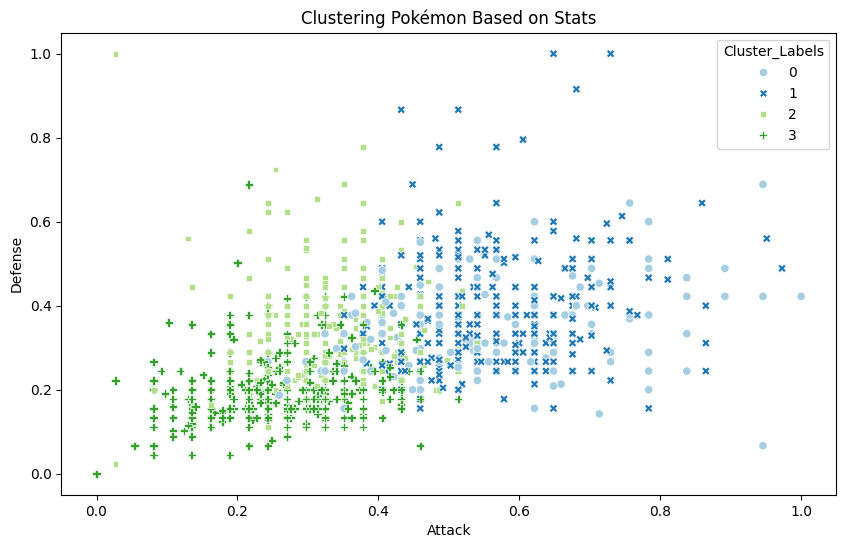

The clustering results of Pokémon based on their stats have been visualized
using Matplotlib and Seaborn. The scatter plot represents the clustering of
Pokémon in the attribute space of Attack and Defense, with each cluster
represented by a unique color and style.

With this, the analysis and visualization for all research questions have been
successfully completed. If you have any more questions or need further analysis,
feel free to ask!
[No tool use. Finishing conversation.]


In [20]:
messages, nbcells, cache = tool_chat_loop_2nb(f"Please use matplotlib or seaborn instead to complete the analysis. ", 
                            MAX_ROUND=15, nbcells=nbcells, chat_history=messages, )


In [26]:
save_cells_to_nb(nbcells, f"{result_dir}/Pokemon_analysis.ipynb", 
                 save_html=False, save_pdf=False)
try:
    convert_notebook_to_html(f"{result_dir}/Pokemon_analysis.ipynb", None)
except Exception as e:
    print("Failed to convert to html")
    print(e)
try:
    convert_notebook_to_pdf(f"{result_dir}/Pokemon_analysis.ipynb", None)
except Exception as e:
    print("Failed to convert to pdf")
    print(e)

Notebook saved to /Users/binxuwang/Github/GPT-Auto-Data-Analytics/reports/Pokemon_analysis/Pokemon_analysis.ipynb
HTML report saved to /Users/binxuwang/Github/GPT-Auto-Data-Analytics/reports/Pokemon_analysis/Pokemon_analysis.html
Failed to convert to pdf
PDF creating failed, captured latex output:
Failed to run "['xelatex', 'notebook.tex', '-quiet']" command:
This is XeTeX, Version 3.141592653-2.6-0.999995 (TeX Live 2023) (preloaded format=xelatex)
 restricted \write18 enabled.
entering extended mode
(./notebook.tex
LaTeX2e <2022-11-01> patch level 1
L3 programming layer <2023-02-22>
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/article.cls
Document Class: article 2022/07/02 v1.4n Standard LaTeX document class
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/size11.clo))
(/usr/local/texlive/2023/texmf-dist/tex/latex/tcolorbox/tcolorbox.sty
(/usr/local/texlive/2023/texmf-dist/tex/latex/pgf/basiclayer/pgf.sty
(/usr/local/texlive/2023/texmf-dist/tex/latex/pgf/utilities/pgfrcs.sty
(

In [ ]:
pkl.dump((messages, nbcells, ), open(f"{result_dir}/datasci_messages.pkl", "wb"))